In [1]:
import numpy as np
import ProjectFunctions as PF


In [2]:
NUM_ACFT = 12
MAX_SORTIES = 8
PROB_PASS_POSTFLT_INSP = 0.8
PROB_REPAIR_FRONTSHOP = 0.7
PROB_PASS_POST_BACKSHOP_INSP = 0.8
#P, S = PF.create_one_step_P_matrix(NUM_ACFT, MAX_SORTIES, PROB_PASS_POSTFLT_INSP, PROB_REPAIR_FRONTSHOP, PROB_PASS_POST_BACKSHOP_INSP)
P, S = PF.create_one_step_P_matrix()

# Initial State:
STARTING_STATE = [0,3,3,3,3]
STARTING_INDEX = PF.state_to_index(S,[0,3,3,3,3])
a = np.zeros(len(P))
a[STARTING_INDEX] = 1
print(PF.index_to_state(S,np.nonzero(a)[0]))



P matrix computed in 3.2722 secs.

Sum of |S| = 1820 rows is 1820.0.

Number of non-zero elements is 30856.
[[0 3 3 3 3]]


In [8]:
pi = PF.get_pi(P)
x =PF.sortie_capable_probability(pi,S,NUM_ACFT,MAX_SORTIES)
print(x)


0.8112561127033342


(0,) (0,) (0,) 
 []


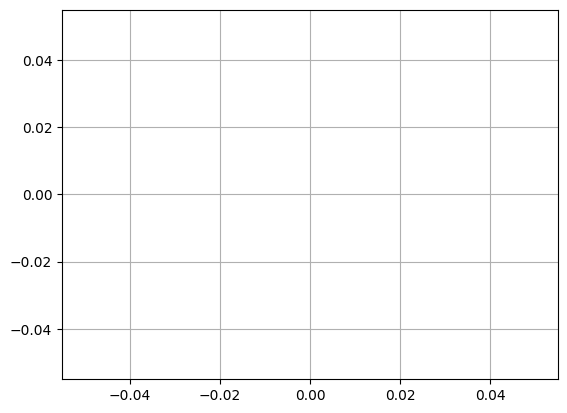

In [4]:
PF.display_behavior(a,P,S,NUM_ACFT,MAX_SORTIES,n=30)



In [5]:
aN = a*P
#print(np.nonzero(aN),np.sum(aN))
print(np.shape(aN), np.shape(pi))
for n in range(10):
    aN = aN*P
    print(PF.sortie_capable_probability(aN,S,NUM_ACFT,MAX_SORTIES),np.sum(aN))

(1, 1820) (1, 1820)
0.21135483784396808 1.0000000000000002
0.7697781633180493 1.0000000000000004
0.8530990109185699 1.0000000000000007
0.8109070685514987 1.0000000000000007
0.7979070295793702 1.0000000000000009
0.8089152027453931 1.0000000000000007
0.8134027974601628 1.0000000000000007
0.8114086144103818 1.0000000000000007
0.8107342370822674 1.0000000000000009
0.8111443767323722 1.0000000000000007
0.8113522087558028 1.0000000000000007
0.8112688567716906 1.0000000000000007
0.8112353009743847 1.0000000000000007
0.8112506525941162 1.0000000000000007
0.811260280270442 1.0000000000000009
0.8112568870803469 1.0000000000000009
0.8112552839063853 1.0000000000000007
0.8112558447478985 1.0000000000000007
0.8112562898034787 1.0000000000000007
0.8112561544312012 1.0000000000000009
0.811256079966848 1.0000000000000009
0.8112560996356993 1.0000000000000009
0.8112561201118118 1.0000000000000007
0.8112561148136294 1.0000000000000007
0.8112561114288017 1.0000000000000009
0.8112561120725579 1.0000000000

(8,) (8,) (8,) 
 [1.         0.78864516 0.23022184 0.14690099 0.18909293 0.20209297
 0.1910848  0.1865972 ]


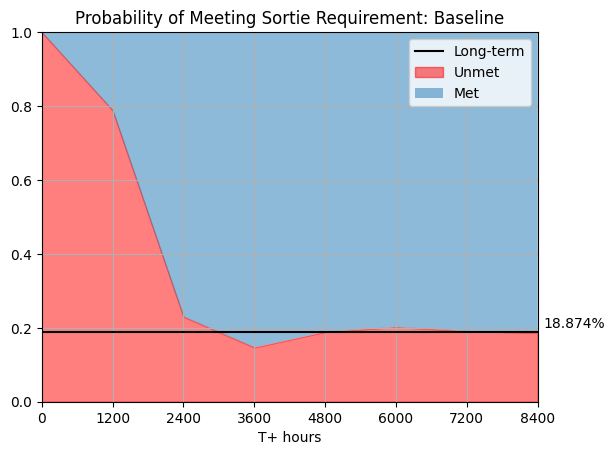

In [43]:
import matplotlib.pyplot as plt

condition = 'Baseline'

n = 7
#pi = pi or PF.get_pi(P)
pie = 1-PF.sortie_capable_probability(pi,S,NUM_ACFT,MAX_SORTIES)
x,y,f = np.empty(0),np.empty(0),np.empty(0)
i=0
aN = a*P
x = np.append(x,i*1200)
f = np.append(f,pie)
y = np.append(y,1-PF.sortie_capable_probability(aN,S,NUM_ACFT,MAX_SORTIES))
while (i<n):
    i+=1
    aN = aN*P
    x = np.append(x,i*1200)
    f = np.append(f,pie)
    y = np.append(y,1-PF.sortie_capable_probability(aN,S,NUM_ACFT,MAX_SORTIES))

print(np.shape(x),np.shape(y),np.shape(f),"\n",y)
fig, ax = plt.subplots()
ax.plot(x,f, color='black', label='Long-term')
ax.annotate('{}%'.format('%.3f'%(pie*100)) ,xy=(x[-1],f[0]),xytext=(x[-1]+100,f[0]+0.01))
ax.fill_between(x, 0, y, alpha=0.5, color='red', label='Unmet')
ax.fill_between(x, 1, y, alpha=0.5, label='Met')
ax.set_xlim(x[0], x[-1])
ax.set_ylim(0, 1)
ax.set(xlabel='T+ hours', xticks=x, ylabel='',
    title='Probability of Meeting Sortie Requirement: {}'.format(condition))
ax.legend(loc='upper right')
ax.grid()
plt.show()